# FDM example

This notebook creates a functional data object from multivariate moons data using the scikit-fda package.

The Moons data functions are created on the grid $x\in[-\pi,\pi]$ and they are expressed using the orthonormal basis functions:

$$\{f_1(x) = \sin(6\pi x), f_2(x) = \sin(12\pi x)\}$$.

Then, we compute the FDM embedding using $\sigma=0.2$ and $\alpha=0.75$ and represent the scores in 2 dimensions.

In [1]:
import numpy as np

import skfda
from sklearn.datasets import make_moons

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["figure.figsize"] = (8, 5)

from fdm import FDM

**Define utils functions**

In [2]:
def plot_scores(ax, scores, y, target, title = "", legend = False):
    """ This function plots the scores of the embedding in two dimensions. """ 
    
    first_score = scores[:, 0]
    second_score = scores[:, 1]

    for i in range(len(set(y))):
        ax.scatter(first_score[y==i], second_score[y==i], label =target[i], color = colors[i], facecolors='none', s = 50)
    
    ax.set_title(title)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if legend:
        ax.legend()
        
def functional_manifold(t, coordinates, basis):
    """ Compute functional data using basis functions. """ 
    parametrization = np.array(coordinates[t])
    return parametrization@basis

**Get multivariate Moons data**

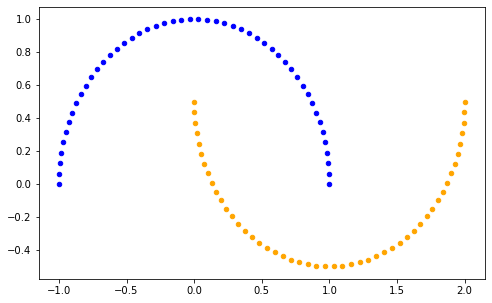

In [3]:
# get multivariate moons data

noise = 0.00 # try other value
data_moon, y = make_moons(noise=noise, random_state = 0)

target = [0, 1]
colors = ["blue", "orange"]
colors_dict = dict(zip(target, colors))

# plot moons data
fig, ax = plt.subplots(1,1)
for i in range(len(set(y))):
    ax.scatter(data_moon[y==i,0], data_moon[y==i,1], label=target[i], color=colors_dict[i], s=20)

plt.show()

**Define basis functions**



In [4]:
# Define interval
n_samples = 1000 # try other value
x_ini = -np.pi # try other value
x_fin = np.pi # try other value

# Create grid
x = np.linspace(x_ini, x_fin, n_samples)

# Define basis functions
basis_1 = np.sin(6*x) # try other value
basis_2 = np.cos(12*x) # try other value

basis_functions = np.array([basis_1, basis_2])

**Define functional data object**

In [5]:
dataset_name="Moons Functional Data"
argument_names=("x",)
coordinate_names=("f(x)",)

fd = skfda.FDataGrid(
    data_matrix=[functional_manifold(t, data_moon, basis_functions) for t in range(len(data_moon))],
    grid_points=x,
    dataset_name=dataset_name,
    argument_names=argument_names,
    coordinate_names=coordinate_names
)

**Show functions in moons manifold**

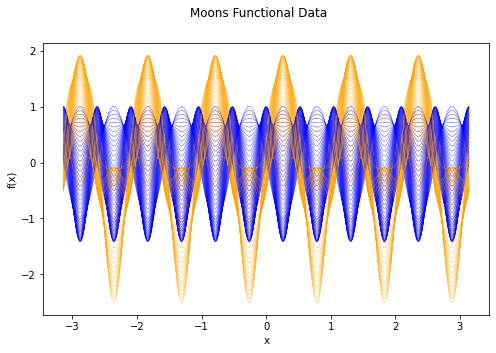

In [6]:
fig = fd.plot(
    group=y,
    group_colors=colors_dict,
    linewidth=0.5,
    alpha=0.7,
)

**Compute FDM embedding**

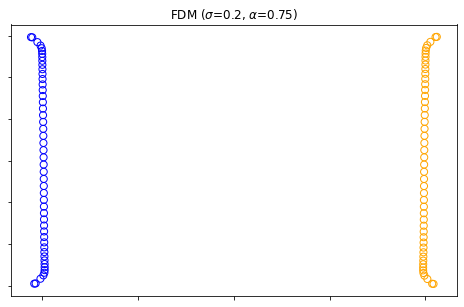

In [7]:
sigma = 0.2 # try other value
alpha = 0.75 # try other value

fdm = FDM(sigma=sigma, alpha=alpha)
fdm_components = fdm.fit_transform(fd)

fig, ax = plt.subplots(1,1)
plot_scores(ax, fdm_components, y, target, r"FDM ($\sigma$={0}, $\alpha$={1})".format(sigma, alpha))